<a href="https://colab.research.google.com/github/danie-cp/Machine-Learning-Models/blob/main/DSC326_Multiple_Regression_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Set working folder by using %cd [working folder] and copy the ames.csv data set to this folder. (Note: Replace the name of my working folder with the one you are using.)

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/DSC326_Spring2025/PythonFolder

/content/drive/MyDrive/Colab Notebooks/DSC326_Spring2025/PythonFolder


Import packages

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.neighbors import KNeighborsRegressor

Load the ames data set. This data set comes from the following link: https://www.openintro.org/data/index.php?data=ames


In [ ]:
ames = pd.read_csv("ames.csv")

Use the info() function from the pandas package to show some info (e.g., type of variable, number of non-missing values) on the columns of the ames DataFrame.

In [ ]:
ames.info()
#There are missing values as less that 2930

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   area             2930 non-null   int64  
 3   price            2930 non-null   int64  
 4   MS.SubClass      2930 non-null   int64  
 5   MS.Zoning        2930 non-null   object 
 6   Lot.Frontage     2440 non-null   float64
 7   Lot.Area         2930 non-null   int64  
 8   Street           2930 non-null   object 
 9   Alley            198 non-null    object 
 10  Lot.Shape        2930 non-null   object 
 11  Land.Contour     2930 non-null   object 
 12  Utilities        2930 non-null   object 
 13  Lot.Config       2930 non-null   object 
 14  Land.Slope       2930 non-null   object 
 15  Neighborhood     2930 non-null   object 
 16  Condition.1      2930 non-null   object 
 17  Condition.2   

Define a subdataframe of the ames data frame (call it ames_sub) consisting only of the columns for the quantitative variables price, area, Lot.Area, Total.Bsmt.SF, Bedroom.AbvGr, TotRms.AbvGrd.

In [ ]:
ames_sub = ames[["price", "area", "Lot.Area", "Total.Bsmt.SF", "Bedroom.AbvGr","TotRms.AbvGrd"]]

Plot the histograms of all quantitative variables in the ames_sub data frame using the hist() function from the pandas package.

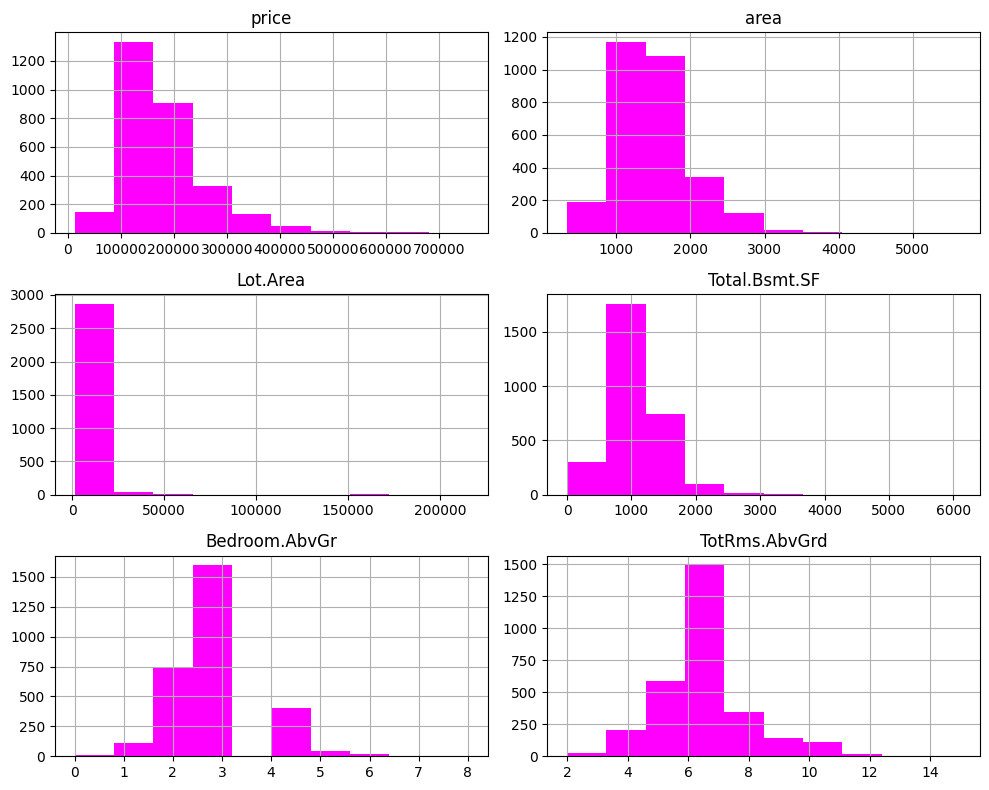

In [ ]:
ames_sub.hist(color = "magenta", figsize = (10,8))
plt.tight_layout()
plt.show()

right skewed: price


Obtain descriptive statistics (mean, std dev, five number summary) for each column of the dataframe.

In [ ]:
ames_sub.describe()

,price,area,Lot.Area,Total.Bsmt.SF,Bedroom.AbvGr,TotRms.AbvGrd
count,2930.000000,2930.000000,2930.000000,2929.000000,2930.000000,2930.000000
mean,180796.060068,1499.690444,10147.921843,1051.614544,2.854266,6.443003
std,79886.692357,505.508887,7880.017759,440.615067,0.827731,1.572964
min,12789.000000,334.000000,1300.000000,0.000000,0.000000,2.000000
25%,129500.000000,1126.000000,7440.250000,793.000000,2.000000,5.000000
50%,160000.000000,1442.000000,9436.500000,990.000000,3.000000,6.000000
75%,213500.000000,1742.750000,11555.250000,1302.000000,3.000000,7.000000
max,755000.000000,5642.000000,215245.000000,6110.000000,8.000000,15.000000


Obtain scatterplot matrix for ames_sub.

In [ ]:
px.scatter_matrix(ames_sub)  #color =price, height/width = 1000

linear relationship with price: area, some in total bsmt and totRms.Abv


Define X to be the sub data frame consisting only of the explanatory (independent) variables area, Total.Bsmt.SF, and TotRms.AbvGrd. Define y to be the sub data frame consisting of the response (dependent) variable price.

In [ ]:
X = ames_sub[["area", "Total.Bsmt.SF", "TotRms.AbvGrd"]]
y = ames_sub[["price"]]

Rename columns of X so that they do not use a dot since this will create problems for the smf.ols() function. Print X to check that the column names have been modified.

In [ ]:
X = X.rename(columns = {"area": "Area", "Total.Bsmt.SF": "TotalBsmtSF", "TotRms.AbvGrd": "TotRmsAbvGrd"})
X

,Area,TotalBsmtSF,TotRmsAbvGrd
0,1656,1080.0,7
1,896,882.0,5
2,1329,1329.0,6
3,2110,2110.0,8
4,1629,928.0,6
...,...,...,...
2925,1003,1003.0,6
2926,902,864.0,5
2927,970,912.0,6
2928,1389,1389.0,6


Determine if there are any missing values in X and in y.

In [ ]:
print("X missing values:\n", X.isnull().sum())
print("y missing values:\n", y.isnull().sum())

X missing values:
 Area            0
TotalBsmtSF     1
TotRmsAbvGrd    0
dtype: int64
y missing values:
 price    0
dtype: int64


Impute any missing data using the mean. Check that there are no more missing values after imputation.

In [ ]:
X = X.fillna(X.median())                #if outliers, use median
X.isnull().sum()

,0
Area,0
TotalBsmtSF,0
TotRmsAbvGrd,0


Split the data in X and y into training and testing sets, use a test set size of 20% of the entire data set. Set the random state to some two-digit integer. Use X_train, y_train, X_test, y_test to denote the data frames for the training and test sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
train_data = pd.concat([X_train, y_train], axis=1)

Perform linear regression using sklearn. Note that the code below fits a first-order model.



In [ ]:
# Create a linear regression model
lin_model = LinearRegression()

# Fit the model to your training data
lin_model.fit(X_train, y_train)

#cacl the rsme on training set
y_train_pred = lin_model.predict(X_train)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
print(" training Root Mean Squared Error:", train_rmse)


# Make predictions on the test data
y_pred = lin_model.predict(X_test)


# Evaluate the model's performance
rmse = root_mean_squared_error(y_test, y_pred)
r2 = lin_model.score(X_train, y_train)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

 training Root Mean Squared Error: 46053.31787368213
Root Mean Squared Error: 57552.422942750054
R-squared: 0.6592652323730637


In [ ]:
# Print the coefficients
print("Coefficients:", lin_model.coef_)
print("Intercept:", lin_model.intercept_)

Coefficients: [[  101.59324384    75.63561966 -7464.98908214]]
Intercept: [-3036.80332807]


Fit a first-order linear regression model using statsmodel. Calculate the rmse on the test set.

In [ ]:
train_df = sm.add_constant(train_data) #include intercept
reg = smf.ols('price~Area+TotalBsmtSF+TotRmsAbvGrd', data = train_df)
res = reg.fit()

test_df = sm.add_constant(X_test) # include intercept
y_pred_reg = res.predict(test_df)

rmse = root_mean_squared_error(y_test, y_pred_reg)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 57552.42294275051


,const,Area,TotalBsmtSF,TotRmsAbvGrd,price
1647,1.0,1664,1529.0,7,213000
2506,1.0,1200,600.0,4,151000
2760,1.0,1809,945.0,8,209700
515,1.0,1590,768.0,6,210000
684,1.0,1148,1148.0,6,132500
...,...,...,...,...,...
1987,1.0,866,686.0,4,110500
1283,1.0,1133,192.0,7,143000
1414,1.0,1347,1117.0,5,107500
1691,1.0,2656,1934.0,8,492000


Show the summary output and the anova table. The summary includes tests of significance of the regression coefficients and confidence intervals for the regression coefficients.


In [ ]:
print(res.summary())
anova_table = sm.stats.anova_lm(res, typ =2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     1509.
Date:                Sun, 16 Feb 2025   Prob (F-statistic):               0.00
Time:                        03:29:47   Log-Likelihood:                -28495.
No. Observations:                2344   AIC:                         5.700e+04
Df Residuals:                    2340   BIC:                         5.702e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3036.8033   4386.223     -0.692   

Conduct a test of overall model utility (the global F-test) at the α = 0.05 level.

F-statistic = 1509 and p-value is ~ 0, so we reject $H_0$. at least one of the explanatior variables is useful for predicting the response
 $H_0$ : any Bi =0
 $H_0a$ : at least one Bi != 0


Write the least squares prediction equation for the price of a house.

$\widehat{y} = -3036.8033 + 101.59x_1 + 75..63x_2 - 7464.98x_3$

Find the model standard deviation (or residual standard error), s, and interpret its value.

s estimates the sigma, 95% will be within 2*s
we expect that 95% of the observed y values a re within 2s = 92,199 of the least-sqaures prediction equation

In [ ]:
n = train_data.shape[0]
k = 3
SSE = anova_table.iloc[3,0]
MSE = SSE/(n-(k+1))
s = np.sqrt(MSE)
print("s:", s)

s= np.sqrt(res.scale)
print('2s:',2*s)

s: 46092.66287690602
2s: 92185.32575381204


What are the R^2 and the adjusted R^2 values? Interpret both values.


In [ ]:
# calculate the R^2 and adjusted R^2
r_squared = res.rsquared
adjusted_r_squared = res.rsquared_adj
print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)

R-squared: 0.6592652323730634
Adjusted R-squared: 0.6588283929273879


Using the independent variables in a first-order model explains 65.93% of the total sample variation in price
 Radj: Using the independent variables in a first-order model explains 65.88% of
the total sample variation in price when sample size and number of β parameters are taken into account.

The variance in the response variable
adjusted takes into acount the number of parameters explained by the model

Test the significance of the coefficient of the regression coefficients. For which independent variables did you get a statistically significant result?

The test for all variables was 0 so all were statisitcally significant

If the test for a regression coefficient is significant, give a practical interpretation of the estimate of the coefficient in the model.

Each additional area had 101.6 increase in price, and for each additional sqaure feet of basement area had a 75.64 increase in price, and for each additonal area of rooms above ground had a decrease of 7464.98 in price

 Based on the above results, would you recommend using the model to predict the sale price of a house in Ames, IA?

Yes, the model can be used as the varaibles were statistically significant and had a R-squared value of .66

Fit second-order model for the price. Calculate the rmse on the test set.

residual anallysis after regression, checks assumption

In [ ]:
train_df = sm.add_constant(train_data) #include intercept
reg_formula = 'price~Area + TotalBsmtSF + TotRmsAbvGrd'
reg_formula = reg_formula + '+ I(Area*TotalBsmtSF) + I(Area*TotRmsAbvGrd) + I(TotalBsmtSF*TotRmsAbvGrd )'
reg_formula = reg_formula + '+ I(Area**2) + I(TotalBsmtSF**2) + I(TotRmsAbvGrd**2)'
reg = smf.ols(reg_formula, data = train_df)
res = reg.fit()

test_df = sm.add_constant(X_test) # include intercept
y_pred_reg = res.predict(test_df)

rmse = root_mean_squared_error(y_test, y_pred_reg)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 55763.55343253551


In [ ]:
'''
another way:
train_df = sm.add_constant(train_data) #include intercept
ref_formula = '(price~Area + TotalBsmtSF + TotRmsAbvGrd)**2'
ref_formula = ref_formula + '+ I(Area**2) + I(TotRmsAbvGrd**2) + I(TotRmsAbvGrd**2 )'
ref_reg = smf.ols(ref_formula, data = train_df)
ref_res = ref_reg.fit()

#add ypred and stuff
'''

"\nanother way:\ntrain_df = sm.add_constant(train_data) #include intercept\nref_formula = '(price~Area + TotalBsmtSF + TotRmsAbvGrd)**2'\nref_formula = ref_formula + '+ I(Area**2) + I(TotRmsAbvGrd**2) + I(TotRmsAbvGrd**2 )'\nref_reg = smf.ols(ref_formula, data = train_df)\nref_res = ref_reg.fit()\n\n#add ypred and stuff\n"

In [ ]:
# another way
reg = smf.ols('price~Area + TotalBsmtSF + TotRmsAbvGrd + I(Area*TotalBsmtSF) + I(Area*TotRmsAbvGrd) + I(TotalBsmtSF*TotRmsAbvGrd ) + I(Area**2) + I(TotalBsmtSF**2) + I(TotRmsAbvGrd**2)', data = train_df)
res = reg.fit()
test_df = sm.add_constant(X_test) # include intercept
y_pred_reg = res.predict(test_df)

rmse = root_mean_squared_error(y_test, y_pred_reg)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 55763.55343253551


Show the summary output and the anova table.

In [ ]:
# insert code
print(res.summary())
anova_table = sm.stats.anova_lm(res, typ =2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     519.5
Date:                Sun, 16 Feb 2025   Prob (F-statistic):               0.00
Time:                        03:29:48   Log-Likelihood:                -28468.
No. Observations:                2344   AIC:                         5.696e+04
Df Residuals:                    2334   BIC:                         5.701e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

Is the second-order model better than the first-order model on the data set we are using?

The seconder order model yielded a slighlty better with a rmse of 55763.55 compared to the first model rmse of 57552.42 and had a slightly worse R-sqaured of .667

Calculate the RMSE of k-NN for regression on the test set for different values of k from 1 to 50. Plot the RMSE on the test set vs k for k = 1 to 50. Which k yielded the best rmse on the test set? Is k-NN with the best k better than either of the above regression models? Why or why not?

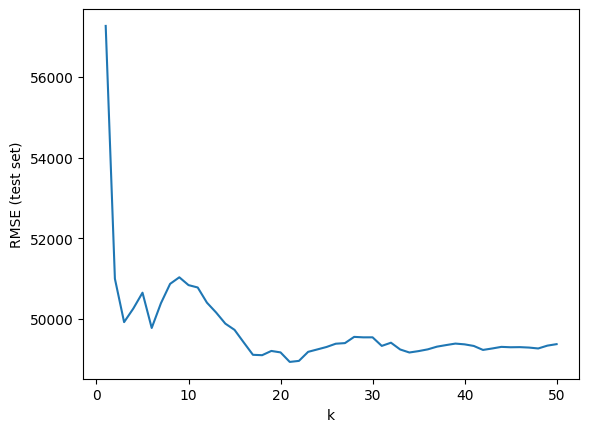

In [ ]:
# insert code

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

numk = 50
kvalues = np.zeros(numk)
RMSETestSet = np.zeros(numk)
for k in range(1,numk+1):
    kvalues[k-1] = k
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(X_train, y_train)
    y_pred = knnreg.predict(X_test)
    RMSETestSet[k-1] = np.sqrt(mean_squared_error(y_test, y_pred))

results_test = pd.concat([pd.Series(kvalues), pd.Series(RMSETestSet)],\
                    axis=1)
results_test.columns = ['k', 'RMSE']

plt.plot(results_test.k, results_test.RMSE)
plt.xlabel("k")
plt.ylabel("RMSE (test set)")
plt.show()

What is the best rmse obtained on the test set and which k yielded this best rmse? Is k-NN with the best k better than either of the above regression models? Why or why not?

In [ ]:
minrsme = np.min(RMSETestSet)
minindex = np.argmin(RMSETestSet)

print("Minimum rsme :", minrsme)
print("index:", minindex)
print("Best k:", kvalues[minindex])
#21

Minimum rsme : 48926.17692899562
index: 20
Best k: 21.0


The best rmse from the test set is 48926.18 which was yielded by k =21. The KNN model is better than the regression models as it had a lower rmse or lower error